<a href="https://colab.research.google.com/github/starceees/Unsupervised-Learning/blob/main/Time_series_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting for Water quality data of River Ganga
- The Uttarkhand Pollution board has collected water quality data of river ganga  at various places(**Lakshmanjhula Rishikesh** is our area of interest) *comprising* of **Temperature** , **PH**, **Disolved Oxygen(DO)** level, **Biological Oxygen Level Demand(BOD)** level, Total Coliform level and many others important for analysing the water quailty.<br>
- We intend to use **Time series Forecasting** methods Comprising of **Deep Learning Methods** to predict the water quality factors for the future and analyse the degradation of water in river ganga over the years.  

## Data Ingesion and visualization 
The data was organized to a sigle .csv file comprizing of 120 rows with 7 columns .

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = '/content/Book1.xlsx - Sheet1.csv'
data = pd.read_csv(url)
print(data)

        Month  Temp °C    pH  DO\n(mg/L) BOD\n(mg/L) Total Coliform\n/100ml
0    Jan-2011     11.4  7.26        10.4         1.4                    Nil
1    Feb-2011     14.2  7.20        11.0         2.4                      5
2      Mar-11     18.8  7.49         9.0         1.3                     22
3      Apr-11     18.8  7.49         9.0         1.3                   22.0
4    May-2011     19.5  7.75         8.4         1.4                  150.0
..        ...      ...   ...         ...         ...                    ...
115    Aug-20     21.0  7.50        10.0           1                     40
116   Sept-20     25.0  7.81        10.8           1                     40
117    Oct-20     26.0  8.00        10.2           1                     40
118    Nov-20     16.0  7.50        11.6           1                     32
119    Dec-20     17.0  7.20        10.8           1                     22

[120 rows x 6 columns]


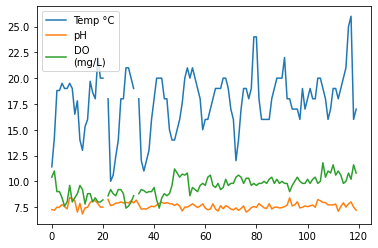

In [ ]:
data.plot()
plt.show()

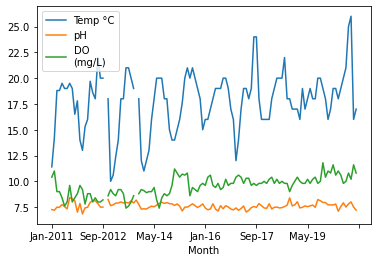

In [ ]:
data.plot(x = "Month")
plt.show()